In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!pip install opencv-python

In [3]:
import matplotlib.pyplot as plt

In [4]:
import cv2

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
image = cv2.imread("/kaggle/input/car-object-detection/data/training_images/vid_4_10420.jpg")

In [7]:
type(image)

numpy.ndarray

In [8]:
import os
import pandas as pd
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import yaml
import shutil

In [9]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


In [10]:
from ultralytics import YOLO
model = YOLO('yolov8s.pt')

100%|██████████| 21.5M/21.5M [00:00<00:00, 177MB/s]


In [11]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [12]:
img = '/kaggle/input/car-object-detection/data/training_images/vid_4_12460.jpg'

In [13]:
from PIL import Image
img_path = img
image = Image.open(img_path)
img_array = np.array(image)
image_dtype = img_array.dtype
print(f'Image data type" {image_dtype}')

Image data type" uint8


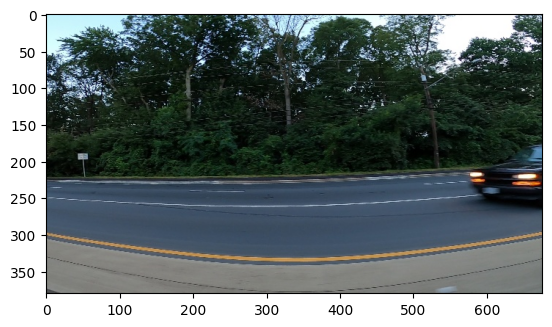

In [14]:
plt.imshow(img_array)

In [15]:
results = model.predict(img_array, conf=0.5)
for result in results:
    boxes = result.boxes


0: 384x640 1 car, 120.9ms
Speed: 12.7ms preprocess, 120.9ms inference, 575.2ms postprocess per image at shape (1, 3, 384, 640)


In [16]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.], device='cuda:0')
conf: tensor([0.8599], device='cuda:0')
data: tensor([[575.8788, 176.5931, 675.6777, 257.2150,   0.8599,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (380, 676)
shape: torch.Size([1, 6])
xywh: tensor([[625.7782, 216.9041,  99.7989,  80.6219]], device='cuda:0')
xywhn: tensor([[0.9257, 0.5708, 0.1476, 0.2122]], device='cuda:0')
xyxy: tensor([[575.8788, 176.5931, 675.6777, 257.2150]], device='cuda:0')
xyxyn: tensor([[0.8519, 0.4647, 0.9995, 0.6769]], device='cuda:0')

In [17]:
class_names = model.names
class_names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

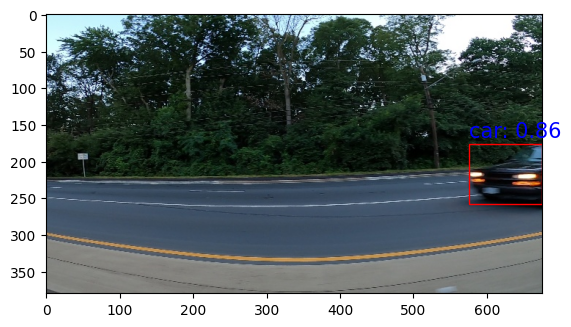

In [18]:
# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_array)

# Iterate over the boxes and annotations
for box, conf, class_idx in zip(boxes.xyxy.cpu(), boxes.conf.cpu(), boxes.cls.cpu()):
    # Get the class index
    class_index = int(class_idx)

    # Get the class name
    class_name = class_names[class_index]

    # Get the box coordinates
    x1, y1, x2, y2 = box[:4]

    # Create a rectangle patch
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')

    
    # Add the rectangle patch to the axes
    ax.add_patch(rect)

    # Add the label and confidence score
    label = f"{class_name}: {conf:.2f}"
    ax.text(x1, y1 - 10, label, fontsize=15, color='b')

# Show the plot
plt.show()

In [19]:
train_data = '/kaggle/input/car-object-detection/data/training_images'
train_csv = '/kaggle/input/car-object-detection/data/train_solution_bounding_boxes (1).csv'
test_data = '/kaggle/input/car-object-detection/data/testing_images'

In [20]:
!mkdir -p "/kaggle/working/data"

!mkdir -p "/kaggle/working/data/images"

!mkdir -p "/kaggle/working/data/images/train"
!mkdir -p "/kaggle/working/data/images/val"

!mkdir -p "/kaggle/working/data/labels"

!mkdir -p "/kaggle/working/data/labels/train"
!mkdir -p "/kaggle/working/data/labels/val"

In [21]:
root_dir = '/kaggle/working/data'
labels_dir = '/kaggle/working/data/labels'
images_dir = '/kaggle/working/data/images'

In [22]:
df = pd.read_csv(train_csv)

width = 676
height = 380

df['class'] = 0 # 차 하나만 검출하니까
df.rename(columns = {'image':'image_name'}, inplace=True)

df['x_centre'] = (df['xmin']+df['xmax'])/2
df['y_centre'] = (df['ymin']+df['ymax'])/2
df['width'] = (df['xmax'] - df['xmin'])
df['height'] = (df['ymax'] - df['ymin'])

#normalising bounding box coordinates
df['x_centre'] = df['x_centre']/width
df['y_centre'] = df['y_centre']/height
df['width'] = df['width']/width
df['height'] = df['height']/height

df_yolo = df[['image_name', 'class', 'x_centre', 'y_centre', 'width', 'height']]
df_yolo.sample(5)

,image_name,class,x_centre,y_centre,width,height
290,vid_4_23000.jpg,0,0.472504,0.570705,0.175109,0.105534
514,vid_4_9320.jpg,0,0.160233,0.536148,0.100510,0.067358
251,vid_4_21300.jpg,0,0.856006,0.557191,0.261939,0.158301
7,vid_4_10140.jpg,0,0.062952,0.576496,0.125904,0.158301
273,vid_4_2160.jpg,0,0.223589,0.601593,0.246020,0.149292


In [23]:
img_list = list(sorted(os.listdir(train_data)))
np.random.shuffle(img_list)

In [24]:
for i, img_name in enumerate(img_list):
    subset ='train'
    if i >= 80/100 * len(img_list):
        subset = 'val'
    
    if np.isin(img_name, df_yolo['image_name']):
        columns = ['class', 'x_centre', 'y_centre', 'width', 'height']
        img_box = df[df['image_name'] == img_name][columns].values
        label_path = os.path.join(labels_dir, subset, img_name[:-4] + '.txt')
        with open(label_path , 'w+') as f:
            for row in img_box:
                text = " ".join(row.astype(str))
                f.write(text)
                f.write('\n')
                
    old_image_path = os.path.join(train_data, img_name)
    new_image_path = os.path.join(images_dir, subset, img_name)
    shutil.copy(old_image_path, new_image_path)
    
    

In [25]:
a = '/kaggle/working/data/images/train'
b = '/kaggle/working/data/labels/train'

num_files_a = len(os.listdir(a))
num_files_b = len(os.listdir(b))

print(f'number of files of images in train folder: {num_files_a}')
print(f'number of files of labels in trian folder: {num_files_b}')


number of files of images in train folder: 801
number of files of labels in trian folder: 290


In [26]:
#여기서 yaml파일 생성
yolo_format = dict(path = '/kaggle/working/data',
                  train='/kaggle/working/data/images/train',
                  val ='/kaggle/working/data/images/val',
                  nc=1,
                  names={0:'car'})

with open('/kaggle/working/yolo.yaml', 'w') as outfile:
    yaml.dump(yolo_format, outfile, default_flow_style=False)


In [27]:
from ultralytics import YOLO

# YOLO 모델 생성
model = YOLO('yolov8n.yaml')  # 'yolov8n.yaml' 또는 사용하고자 하는 다른 모델 설정 파일

# 모델 학습
results = model.train(data='/kaggle/working/yolo.yaml', epochs=20, patience=5, batch=16, lr0=0.01, imgsz=640)

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/working/yolo.yaml, epochs=20, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]
2024-06-05 06:40:42,983	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-05 06:40:43,812	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 72.1MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/data/labels/train... 290 images, 511 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 1736.57it/s]

train: New cache created: /kaggle/working/data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/data/labels/val... 65 images, 135 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 1787.66it/s]

val: New cache created: /kaggle/working/data/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.45G      4.347       9.27      4.033          1        640: 100%|██████████| 51/51 [00:11<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.39it/s]

                   all        200         99   2.26e-05     0.0101   1.15e-05   2.29e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.41G      2.837      4.649      2.788          0        640: 100%|██████████| 51/51 [00:09<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.20it/s]


                   all        200         99   2.38e-05     0.0101   1.25e-05   2.49e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.41G      2.346       3.05      2.267          0        640: 100%|██████████| 51/51 [00:09<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.65it/s]

                   all        200         99      0.529      0.101      0.175     0.0827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.4G      2.136      2.249      2.104          2        640: 100%|██████████| 51/51 [00:09<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.39it/s]

                   all        200         99      0.651      0.657      0.643      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.41G      1.985      1.934      2.001          1        640: 100%|██████████| 51/51 [00:09<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.30it/s]

                   all        200         99      0.797      0.714      0.794      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.41G      1.899      1.685      1.932          2        640: 100%|██████████| 51/51 [00:09<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.41it/s]

                   all        200         99      0.929      0.657      0.785      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.41G      1.835      1.546      1.882          2        640: 100%|██████████| 51/51 [00:09<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.18it/s]

                   all        200         99      0.973      0.715      0.861      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       2.4G      1.811      1.382      1.778          1        640: 100%|██████████| 51/51 [00:08<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.12it/s]

                   all        200         99       0.96      0.798      0.908      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.41G      1.676       1.29      1.676          0        640: 100%|██████████| 51/51 [00:09<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.25it/s]


                   all        200         99      0.911      0.848      0.918       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.41G      1.628      1.166      1.647          0        640: 100%|██████████| 51/51 [00:09<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.01it/s]

                   all        200         99      0.931       0.82      0.899      0.526


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.41G      1.553      1.364      1.689          0        640: 100%|██████████| 51/51 [00:10<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  7.80it/s]

                   all        200         99      0.911      0.818      0.914      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.4G      1.589      1.262      1.712          2        640: 100%|██████████| 51/51 [00:08<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.37it/s]

                   all        200         99       0.91      0.788      0.904      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.41G      1.543      1.181      1.696          1        640: 100%|██████████| 51/51 [00:09<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.24it/s]

                   all        200         99      0.988      0.863       0.94      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.41G      1.582      1.292      1.667          0        640: 100%|██████████| 51/51 [00:08<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.56it/s]

                   all        200         99      0.971      0.879      0.938      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.41G      1.509      1.105      1.603          0        640: 100%|██████████| 51/51 [00:08<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.07it/s]

                   all        200         99      0.919      0.899      0.944      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       2.4G       1.41      1.029      1.548          0        640: 100%|██████████| 51/51 [00:08<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.68it/s]

                   all        200         99      0.976      0.929      0.958      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.41G      1.437      1.013      1.569          2        640: 100%|██████████| 51/51 [00:08<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.40it/s]

                   all        200         99      0.957      0.909      0.953      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.41G      1.398     0.9538      1.536          0        640: 100%|██████████| 51/51 [00:08<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.42it/s]

                   all        200         99      0.967      0.886      0.952      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.41G       1.37      1.072      1.523          2        640: 100%|██████████| 51/51 [00:08<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.41it/s]

                   all        200         99      0.948      0.919      0.954      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.4G      1.324     0.8927      1.494          2        640: 100%|██████████| 51/51 [00:08<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.46it/s]

                   all        200         99      0.979      0.919       0.96      0.633



20 epochs completed in 0.063 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.20it/s]


                   all        200         99       0.98      0.919       0.96      0.633
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


In [28]:
path_best_weights="/kaggle/working/runs/detect/train/weights/best.pt"
model = YOLO(path_best_weights) 
metrics = model.val(iou=0.5) 

Ultralytics YOLOv8.2.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/working/data/labels/val.cache... 65 images, 135 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.80it/s]


                   all        200         99       0.99      0.919      0.967      0.627
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val


In [29]:
print('정밀도:', metrics.box.map50)

정밀도: 0.9668066593444536


In [30]:
print(dir(metrics.confusion_matrix))
print(metrics.confusion_matrix)
print(metrics.confusion_matrix.iou_thres)
print(metrics.confusion_matrix.matrix)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'conf', 'iou_thres', 'matrix', 'nc', 'plot', 'print', 'process_batch', 'process_cls_preds', 'task', 'tp_fp']
0.45
[[         91           1]
 [          8           0]]


In [31]:
# results_dict 속성 확인
print(metrics.results_dict)

print(dir(metrics.results_dict))

{'metrics/precision(B)': 0.9900470970916313, 'metrics/recall(B)': 0.9191919191919192, 'metrics/mAP50(B)': 0.9668066593444536, 'metrics/mAP50-95(B)': 0.6269558952312321, 'fitness': 0.6609409716425543}
['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


In [32]:
# 결과 딕셔너리에서 정답 바운딩 박스의 정보 추출하기
if 'target' in result:
    target_boxes = result['target']
elif 'true' in result:
    target_boxes = result['true']
else:
    print("정답 바운딩 박스의 정보가 결과 딕셔너리에 없습니다.")


정답 바운딩 박스의 정보가 결과 딕셔너리에 없습니다.


In [33]:
with torch.no_grad():
    results = model.predict(source = test_data, conf=0.5, iou=0.75)


image 1/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25100.jpg: 384x640 (no detections), 56.4ms
image 2/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25120.jpg: 384x640 (no detections), 6.9ms
image 3/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25140.jpg: 384x640 (no detections), 6.8ms
image 4/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25160.jpg: 384x640 (no detections), 7.6ms
image 5/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25180.jpg: 384x640 (no detections), 6.7ms
image 6/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25200.jpg: 384x640 (no detections), 6.7ms
image 7/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25220.jpg: 384x640 (no detections), 6.8ms
image 8/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25240.jpg: 384x640 (no detections), 6.6ms
image 9/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25260

In [34]:
!mkdir -p = '/kaggle/working/predictions'
prediction_dir = '/kaggle/working/predictions'

In [35]:
test_img_list=[]
for result in results:
    if len(result.boxes.xyxy):
        name=result.path.split("/")[-1].split(".")[0]
        boxes=result.boxes.xyxy.cpu().numpy()
        scores=result.boxes.conf.cpu().numpy()
        
        test_img_list.append(name)
        
        label_file_path=os.path.join(prediction_dir,name+".txt")
        with open(label_file_path,"w+") as f:
            for score,box in zip(scores,boxes):
                text=f"{score:0.4f} "+" ".join(box.astype(str))
                f.write(text)
                f.write("\n")

In [36]:
def show_bbox(img,boxes,scores,axis,color=(0,255,0)):
    boxes=boxes.astype(int)
    scores=scores
    img=img.copy()
    for i,box in enumerate(boxes):
        score=f"{scores[i]:.4f}"
        cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),color,2)
        y=box[1]-10 if box[1]-10>10 else box[1]+10
        cv2.putText(img,score,(box[0],y),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
    
    axis.imshow(img)
    axis.axis("off")

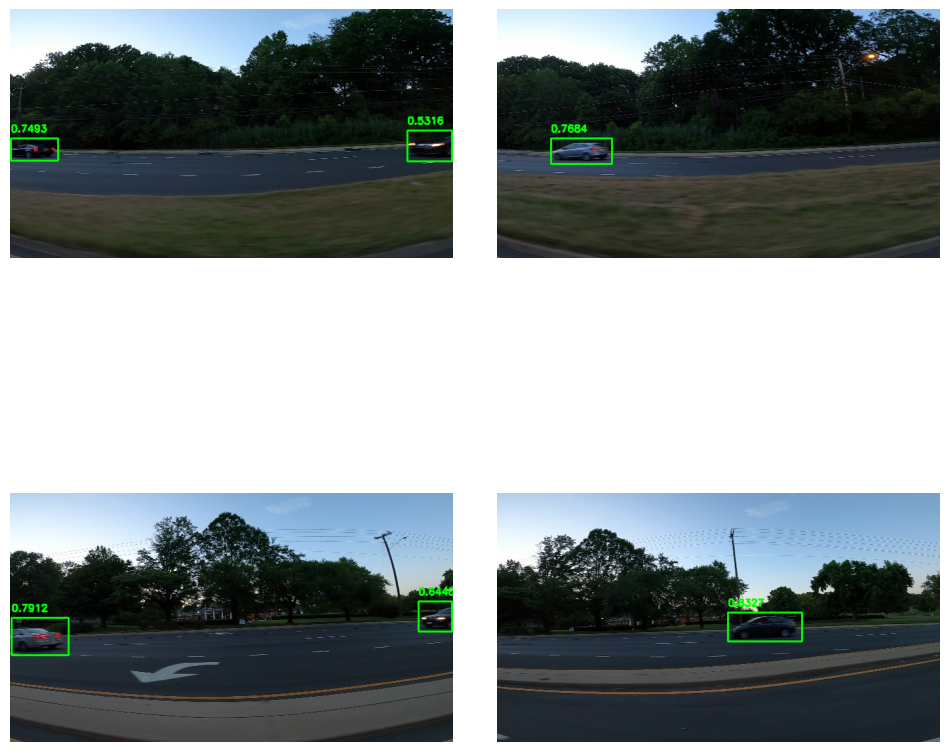

In [37]:
fig,axes=plt.subplots(2,2,figsize=(12,12))
plt.subplots_adjust(wspace=0.1,hspace=0.1)
ax=axes.flatten()

imgs_name=np.random.choice(test_img_list,4)

for i,img_name in enumerate(imgs_name):
    img_file_path=os.path.join(test_data,img_name+".jpg")
    img=cv2.imread(img_file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    label_file_path=os.path.join(prediction_dir,img_name+".txt")
    label=pd.read_csv(label_file_path,sep=" ",header=None).values
    scores=label[:,0]
    boxes=label[:,1:]
    show_bbox(img,boxes,scores,axis=ax[i])
    
plt.savefig("car.png")